In [1]:

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

from   sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df_completo = pd.read_csv("..\\Dados\\econ_r_ind_low_countries.csv", sep=";")
df_completo.head()

,Economic_Resilience_Index,Country,Fiscal_space,Monetary_policy_space,low-carbon_economy,Insurance_penetration,Financial_Market_development,Human_capital,Economic_complexity,Labour_market_efficiency,Banking_industry_backdrop,Macroeconomic_Resilience_index,Year
0,15,Chile,1.00,0.37,0.77,0.28,0.00,0.36,0.00,1.00,0.37,0.66,2019
1,20,Brazil,0.75,0.19,0.91,0.21,0.46,0.00,0.20,0.82,0.00,0.52,2019
2,22,South Africa,0.50,0.65,0.00,1.00,0.31,0.00,0.00,0.76,0.29,0.49,2019
3,25,India,0.99,0.28,0.50,0.18,0.19,0.00,0.17,0.30,0.00,0.48,2019
4,26,Russia,1.00,0.43,0.07,0.00,0.00,0.94,0.21,0.00,0.30,0.48,2019


In [3]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Economic_Resilience_Index       78 non-null     int64  
 1   Country                         78 non-null     object 
 2   Fiscal_space                    78 non-null     float64
 3   Monetary_policy_space           78 non-null     float64
 4   low-carbon_economy              78 non-null     float64
 5   Insurance_penetration           78 non-null     float64
 6   Financial_Market_development    78 non-null     float64
 7   Human_capital                   78 non-null     float64
 8   Economic_complexity             78 non-null     float64
 9   Labour_market_efficiency        78 non-null     float64
 10  Banking_industry_backdrop       78 non-null     float64
 11  Macroeconomic_Resilience_index  78 non-null     float64
 12  Year                            78 non

In [4]:
df_completo.isnull().any()

Economic_Resilience_Index         False
Country                           False
Fiscal_space                      False
Monetary_policy_space             False
low-carbon_economy                False
Insurance_penetration             False
Financial_Market_development      False
Human_capital                     False
Economic_complexity               False
Labour_market_efficiency          False
Banking_industry_backdrop         False
Macroeconomic_Resilience_index    False
Year                              False
dtype: bool

In [5]:

evaluation = pd.DataFrame(
    {
        "Model": [],
        "Details": [],
        "Root Mean Squared Error (RMSE)": [],
        "R-squared (training)": [],
        "Adjusted R-squared (training)": [],
        "R-squared (test)": [],
        "Adjusted R-squared (test)": [],
        "5-Fold Cross Validation": []
    }
)

In [6]:
def adjusted_r2(r2, n, k):
    return r2 - (n - 1) * (1 - r2) / (n - k - 1)

In [26]:
train_data, test_data = train_test_split(df_completo, train_size=0.8, random_state=3)

independent_var = ["Financial_Market_development", 
                   "low-carbon_economy",  
                   "Economic_complexity", 
                   "Labour_market_efficiency", 
                   "Banking_industry_backdrop",
                   #"Fiscal_space", 
                   #"Monetary_policy_space", 
                   #"Human_capital"
                  ]
lin_reg = LinearRegression()
lin_reg.fit(train_data[independent_var], train_data["Insurance_penetration"])

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

Intercept: 0.33704720320053894
Coefficients: [ 0.20878239 -0.63105576 -0.70116307  0.67378519 -0.59660809]


In [27]:
pred = lin_reg.predict(test_data[independent_var])

In [28]:
rmse = metrics.mean_squared_error(test_data["Insurance_penetration"], pred)
r2_train = lin_reg.score(train_data[independent_var], train_data["Insurance_penetration"])
ar2_train = adjusted_r2(
    r2_train,
    train_data.shape[0],
    len(independent_var)
)

r2_test = lin_reg.score(test_data[independent_var], test_data["Insurance_penetration"])
ar2_test = adjusted_r2(
    r2_test,
    test_data.shape[0],
    len(independent_var)
)

cross_val = cross_val_score(lin_reg, df_completo[independent_var], df_completo["Insurance_penetration"], cv=5).mean()

r = evaluation.shape[0]
evaluation.loc[r] = ["Multiple Linear Regression-1", "Selected features", rmse, r2_train, ar2_train, r2_test, ar2_test, cross_val]
evaluation.sort_values(by="5-Fold Cross Validation", ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Linear Regression-1,Selected features,0.019443,0.852235,0.691276,0.789303,0.473257,0.806066
2,Multiple Linear Regression-1,Selected features,0.018891,0.859107,0.702844,0.795293,0.454115,0.800163
1,Multiple Linear Regression-1,Selected features,0.019779,0.863410,0.709113,0.785663,0.383781,0.796003
0,Multiple Linear Regression-1,Selected features,0.019690,0.863486,0.706366,0.786634,0.329421,0.769984


In [29]:

# Retorna um array de zeros com o mesmo shape e tipo do array dado
mask = np.zeros_like(df_completo.corr(), dtype=bool)

# Retorna os índices apenas do triângulo superior do array
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

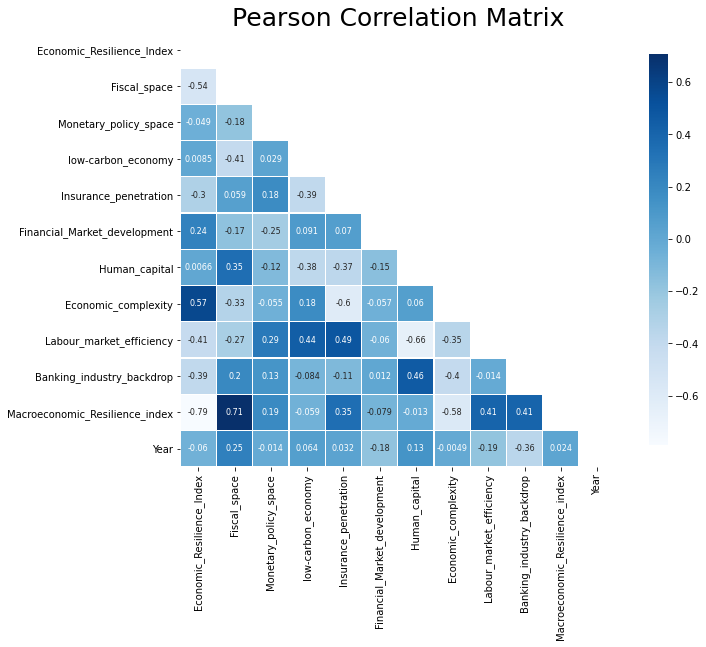

In [30]:
plt.subplots(figsize=(12, 8))
plt.title("Pearson Correlation Matrix", fontsize=25)

sns.heatmap(
    df_completo.corr(),
    linewidths=0.25,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9}
)

In [31]:
X = np.column_stack((df_completo['Financial_Market_development'], 
                     df_completo['low-carbon_economy'], 
                     df_completo['Economic_complexity'], 
                     df_completo['Labour_market_efficiency'], 
                     df_completo['Banking_industry_backdrop'],
                     #df_completo['Human_capital'], 
                     #df_completo['Monetary_policy_space'], 
                     #df_completo['Fiscal_space'] 
                     ))
y = df_completo['Insurance_penetration']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                              OLS Regression Results                             
Dep. Variable:     Insurance_penetration   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     78.87
Date:                   Mon, 01 Nov 2021   Prob (F-statistic):           8.26e-28
Time:                           10:29:58   Log-Likelihood:                 45.301
No. Observations:                     78   AIC:                            -78.60
Df Residuals:                         72   BIC:                            -64.46
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3260 

In [13]:
df_completo['Human_capital'], df_completo['Monetary_policy_space'], df_completo['Fiscal_space'], 

"Fiscal_space", "Monetary_policy_space", "Human_capital", 

('Fiscal_space', 'Monetary_policy_space', 'Human_capital')